# Расчётное задание 2a (Статическая обработка случайный последовательностей. Идентификация законов распределения)
- **Студент:** Сыров Егор Романович
- **Группа:** 5130901/30201

## Задание 1: Статистическая обработка случайных последовательностей

### 1.1: Создать 10 подвыборок

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

with open("Task_2a.txt", "r") as file:
    N = int(file.readline())
    X = np.array(tuple(map(float, file.readline().split())))

np.random.seed(42)
Xperm = np.random.permutation(X)
Xpodv = np.split(Xperm, 10)
Xpodv_sorted = [np.sort(podv) for podv in Xpodv]

### 1.2: Представить визуально оценки функции плотности распределения

### 1.2.1: Выборочная функция распределния F(x)

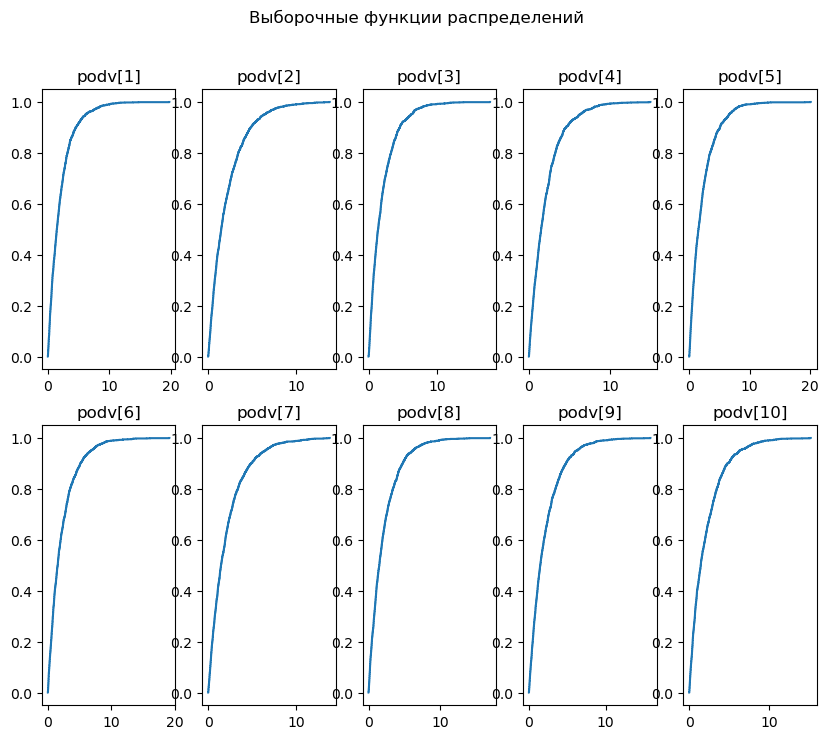

In [94]:
fig, ax = plt.subplots(2, 5, figsize=(10, 8))
fig.suptitle("Выборочные функции распределений")
for index, podv in enumerate(Xpodv_sorted):
    res = scipy.stats.ecdf(podv)
    ax[index // 5, index % 5].step(res.cdf.quantiles, res.cdf.probabilities, where='post')
    ax[index // 5, index % 5].set_title(f"podv[{index + 1}]")    

### 1.2.2: Абсолютные и относительные гистограммы распределений

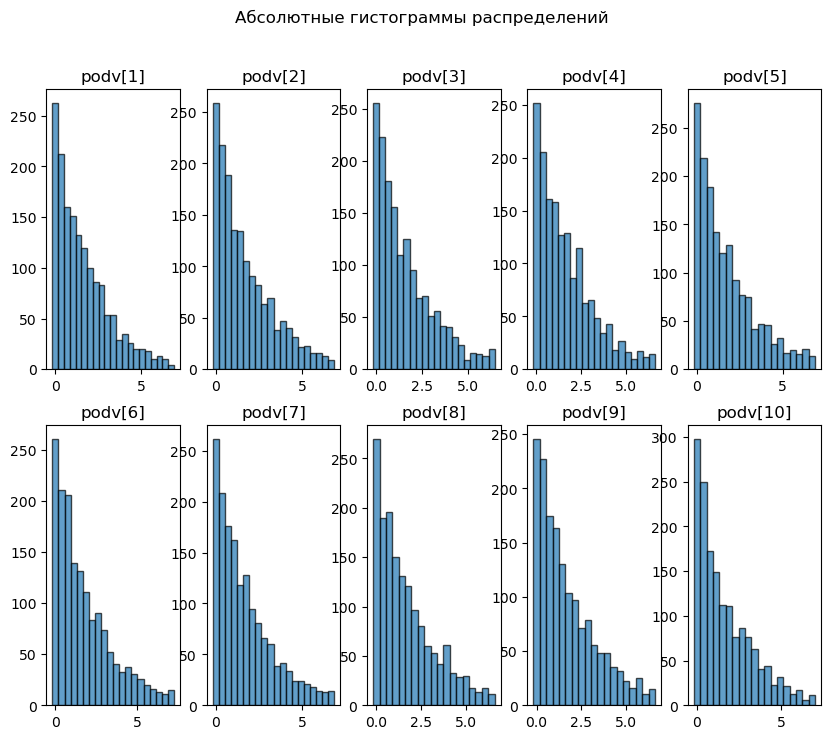

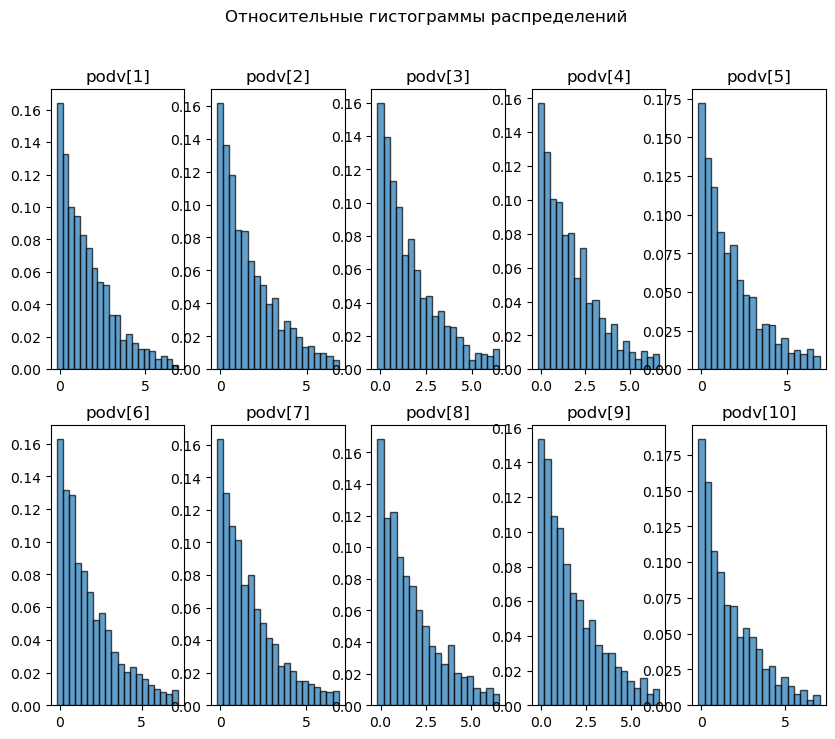

In [95]:
fig, ax = plt.subplots(2, 5, figsize=(10, 8))
fig.suptitle("Абсолютные гистограммы распределений")
for index, podv in enumerate(Xpodv_sorted):
    counts, bin_edges = np.histogram(podv[:-60], bins="fd")
    ax[index // 5, index % 5].bar(bin_edges[:-1], counts, width=np.diff(bin_edges), alpha=0.7, edgecolor='black')
    ax[index // 5, index % 5].set_title(f"podv[{index + 1}]")

fig, ax = plt.subplots(2, 5, figsize=(10, 8))
fig.suptitle("Относительные гистограммы распределений")
for index, podv in enumerate(Xpodv_sorted): 
    counts, bin_edges = np.histogram(podv[:-60], bins="fd")
    ax[index // 5, index % 5].bar(bin_edges[:-1], counts / len(podv[:-60]), width=np.diff(bin_edges), alpha=0.7, edgecolor='black')
    ax[index // 5, index % 5].set_title(f"podv[{index + 1}]")

### 1.2.3: Оценки плотности распределений с применением ядерного оценивания

**Функции ядер**

In [96]:
# Прямоугольное (равномерное ядро)
def uniform_kernel(u):
    return np.where(np.abs(u) < 0.5, 1.0, 0.0)

# Гауссово ядро
def gaussian_kernel(u):
    return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)

# Экспоненциальное ядро (Лапласа)
def laplas_kernel(u):
    return 1 / 2 * np.exp(-np.abs(u))

# Ядро Коши
def koshi_kernel(u):
    return 1 / np.pi / (1 + u**2)

# Треугольное ядро
def triangle_kernel(u):
    return np.where(np.abs(u) < 1, 1 - np.abs(u), 0)

# Восстанавливающий фильтр
def restorative_filter(u):
    return 1 / (2 * np.pi) * (np.sin(u / 2) / (u / 2))**2

**Ядерная оценка плотности для различных ядер**


Подвыборка 1:


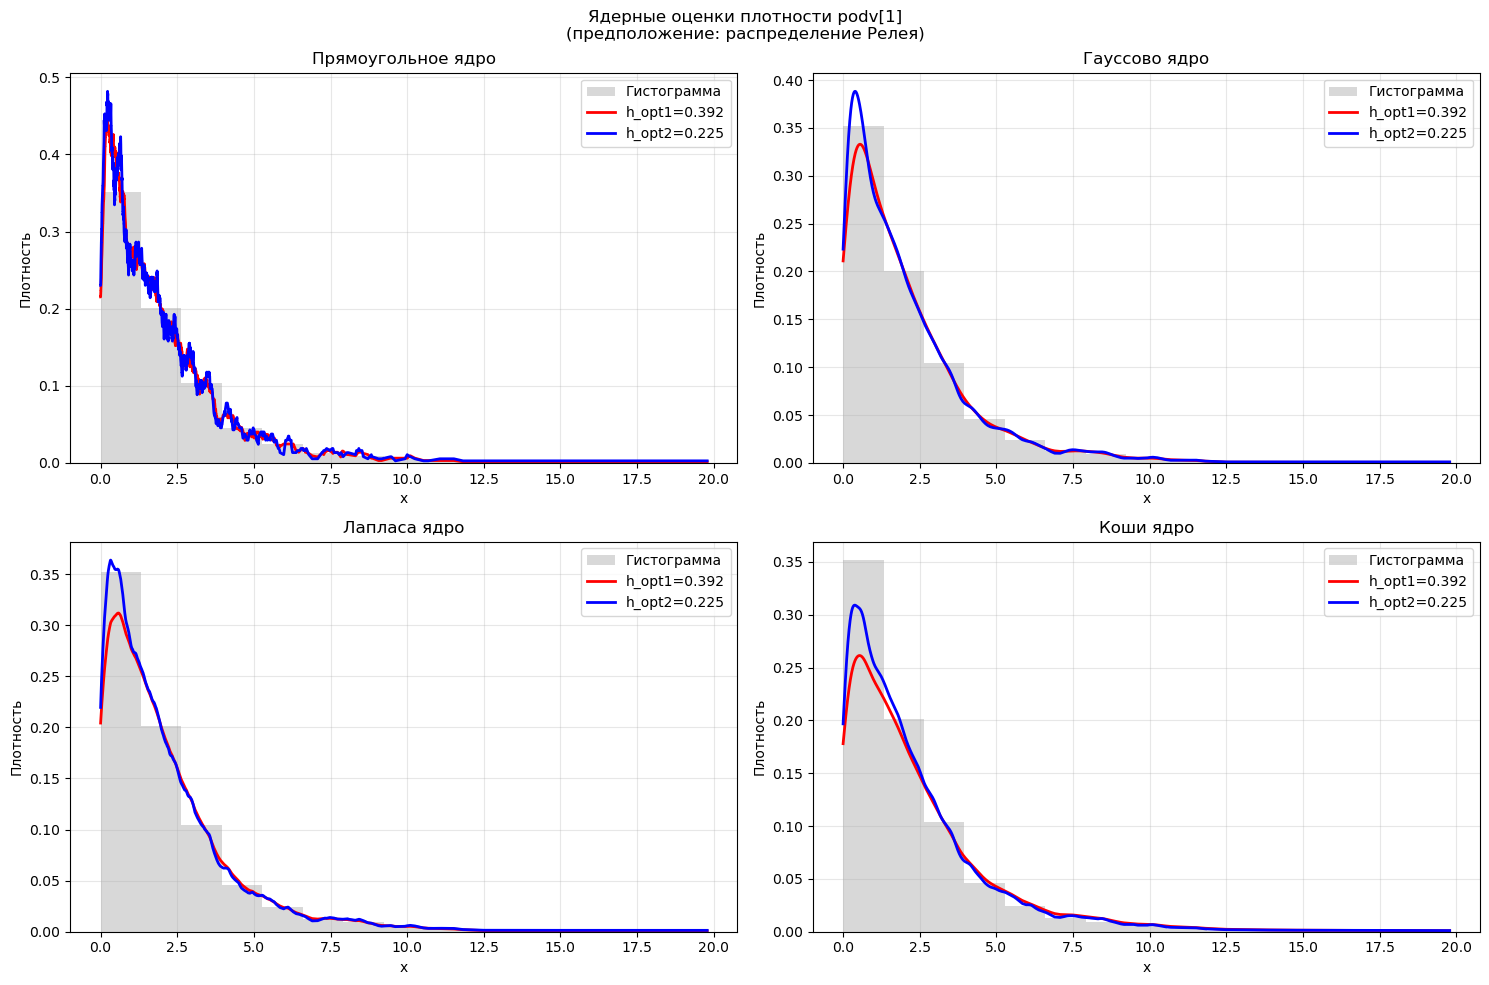


Подвыборка 2:


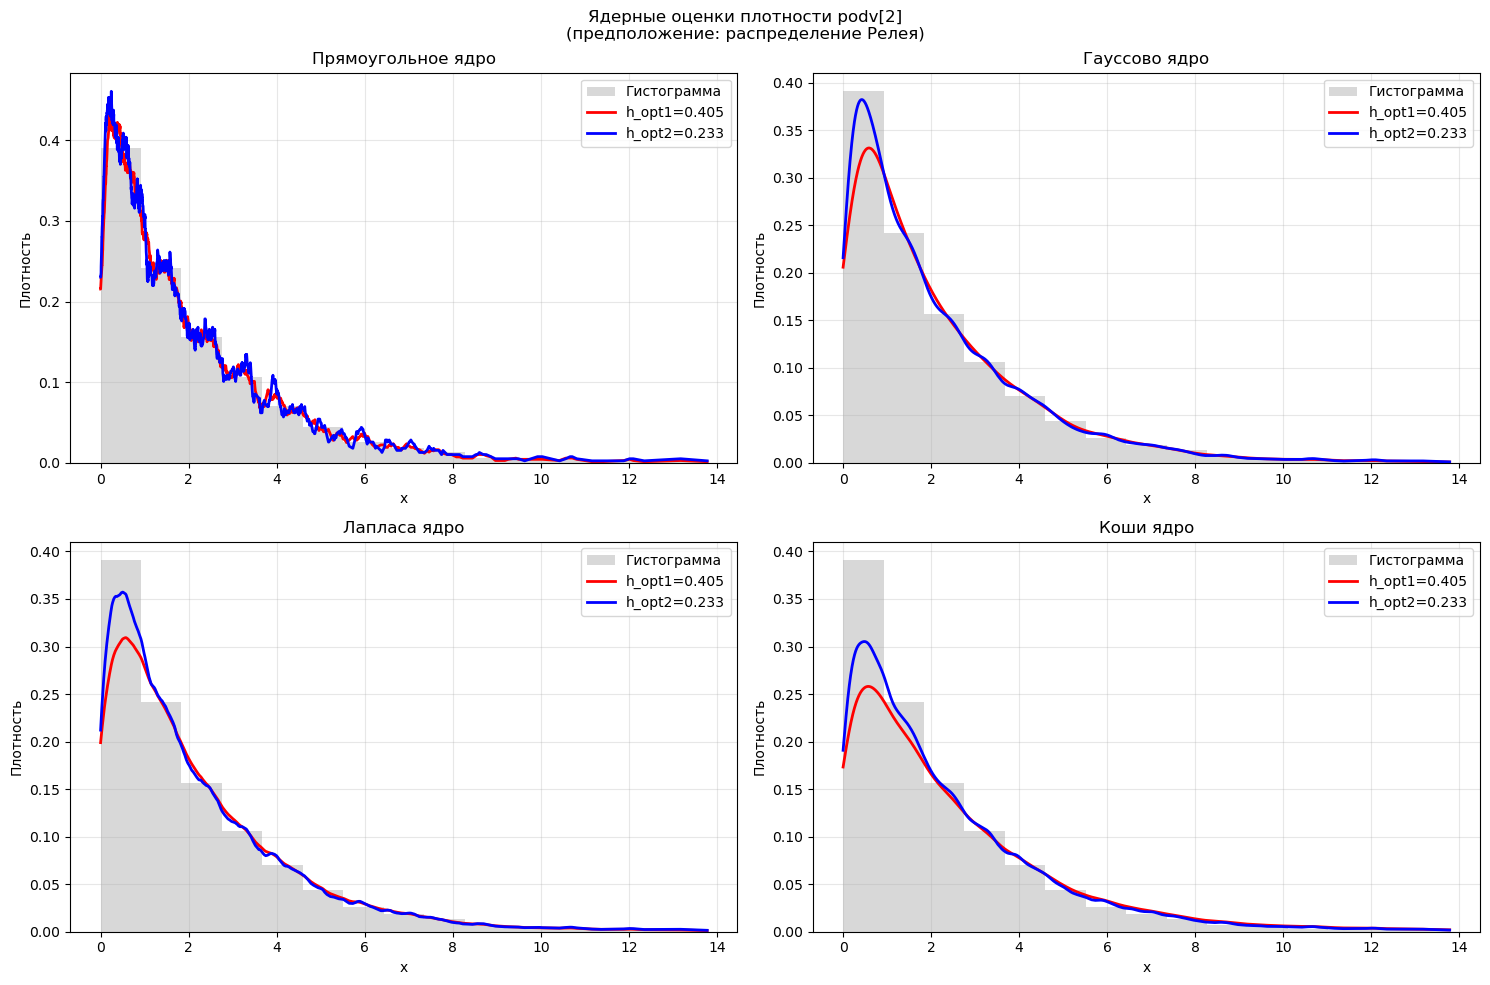


Подвыборка 3:


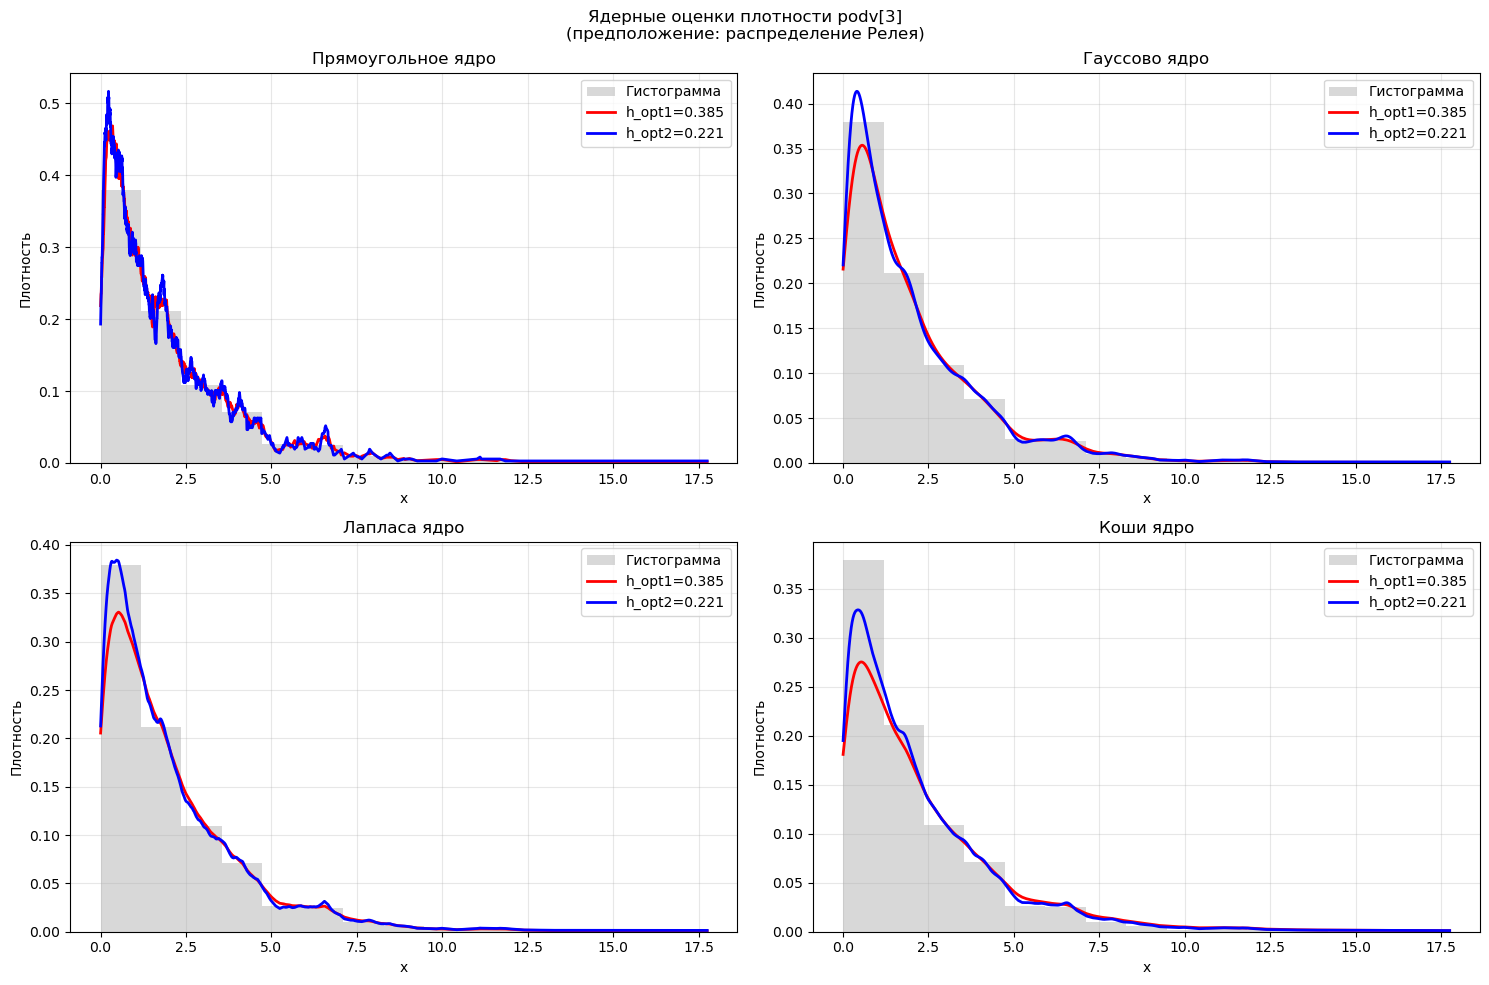


Подвыборка 4:


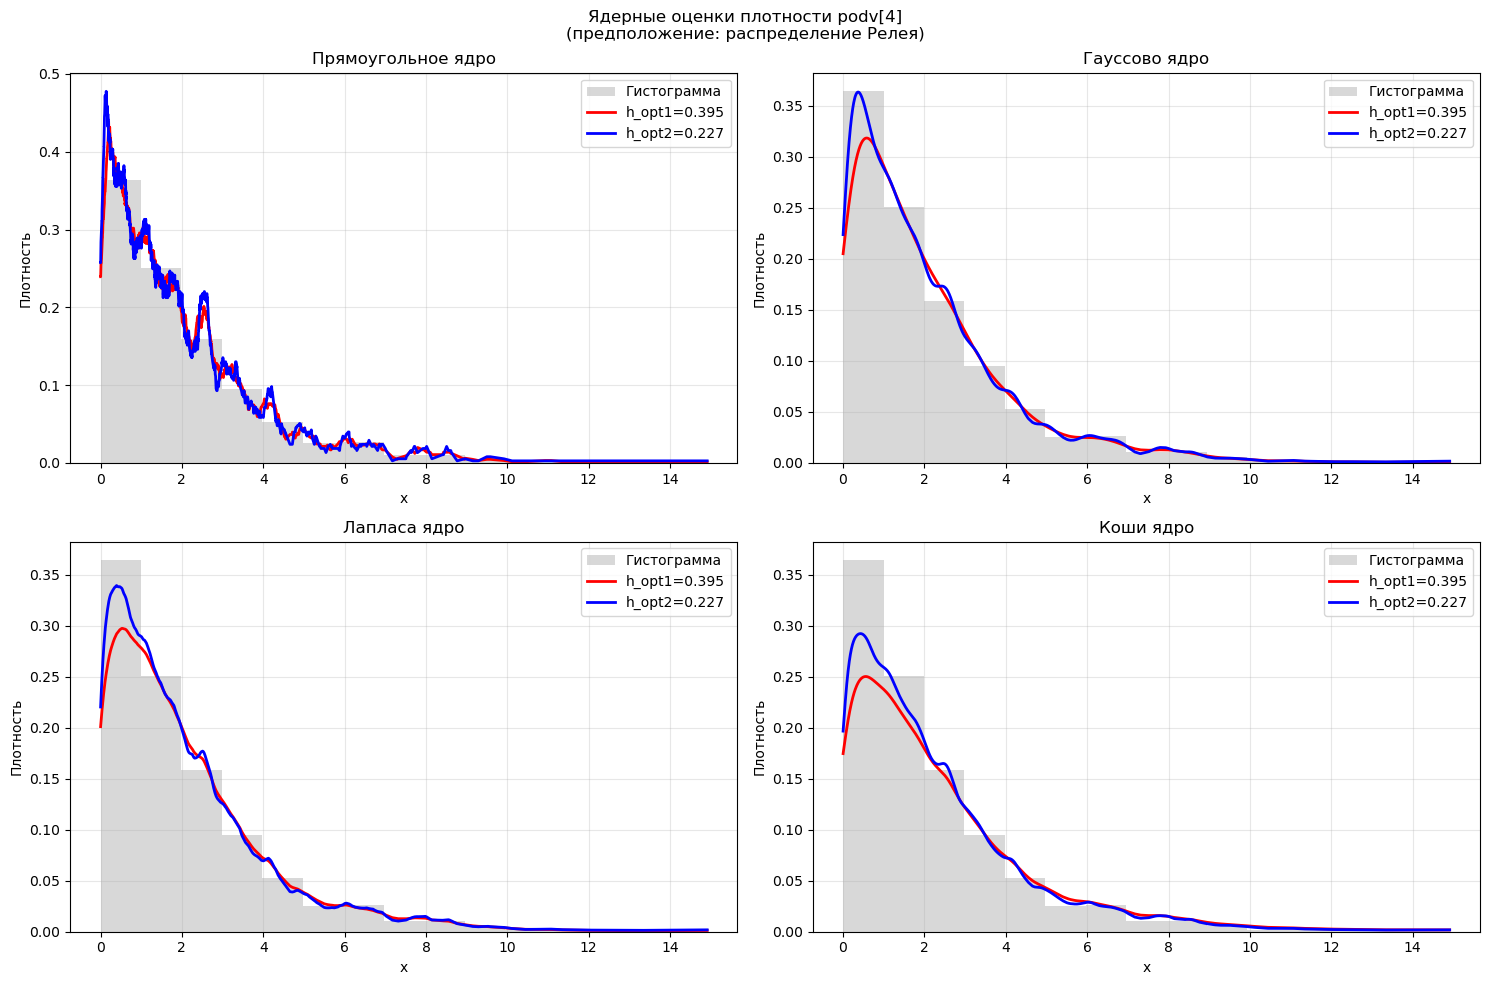


Подвыборка 5:


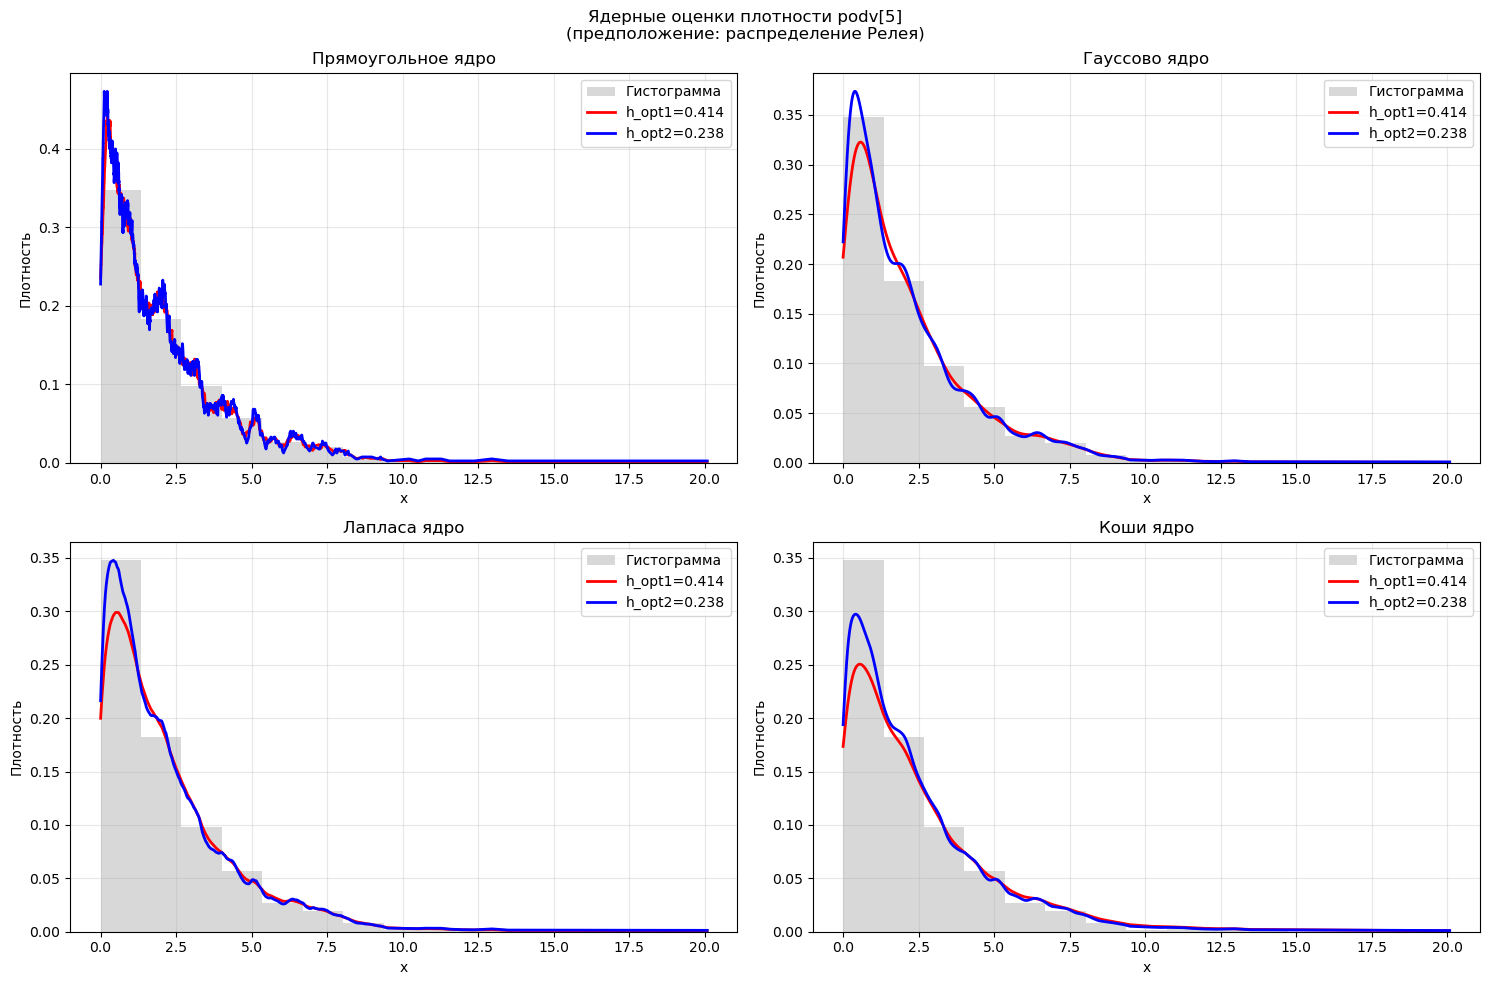


Подвыборка 6:


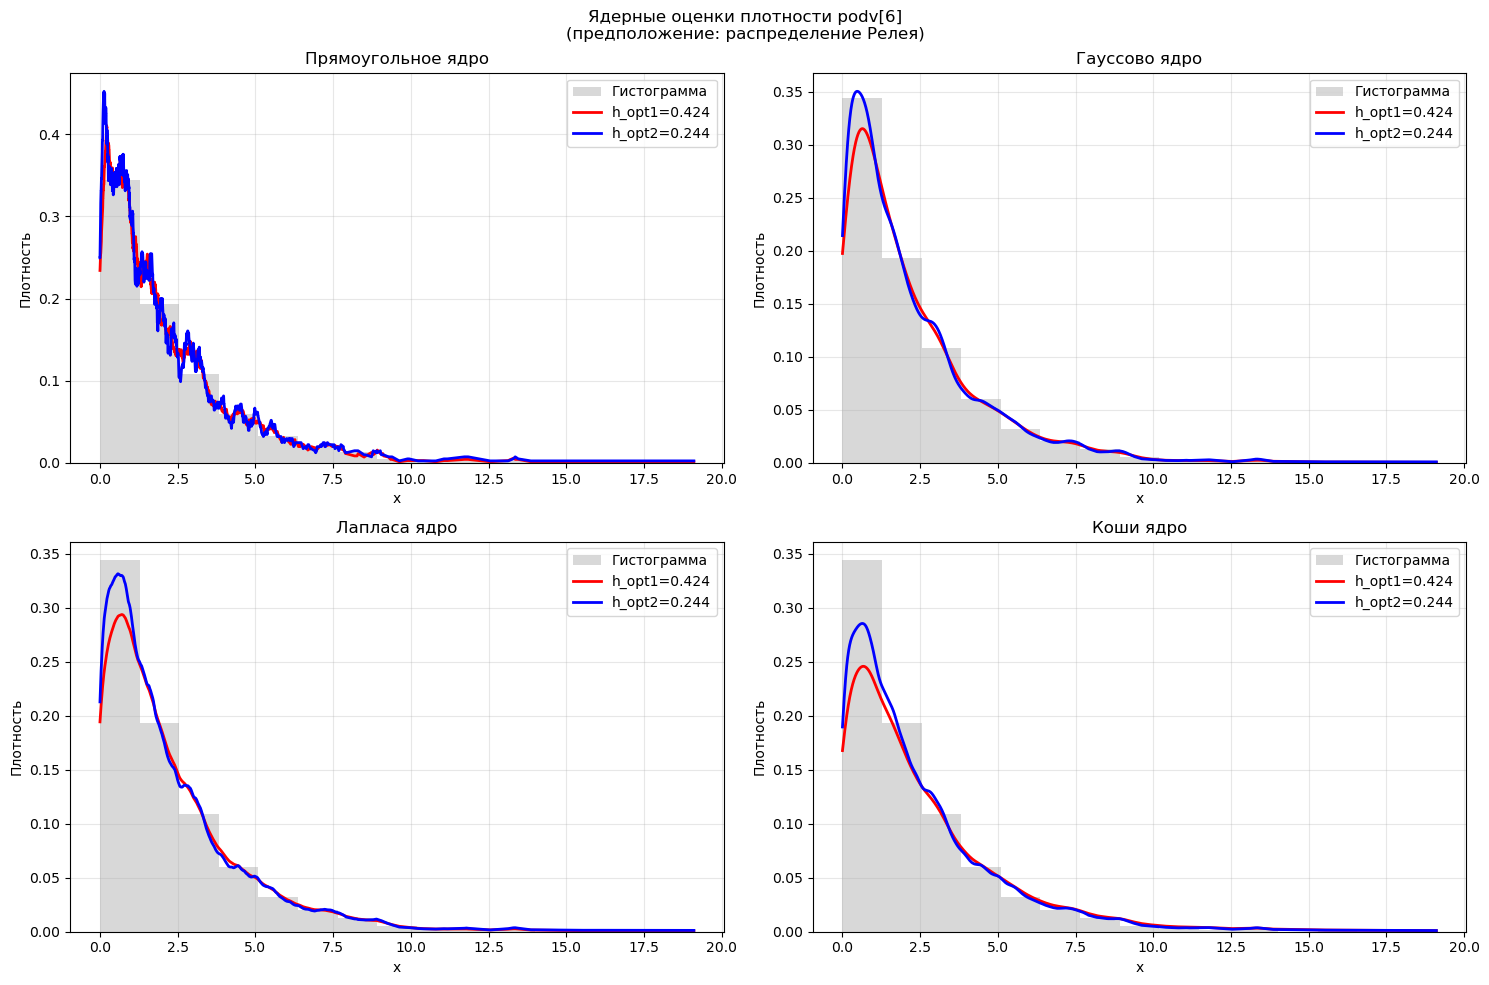


Подвыборка 7:


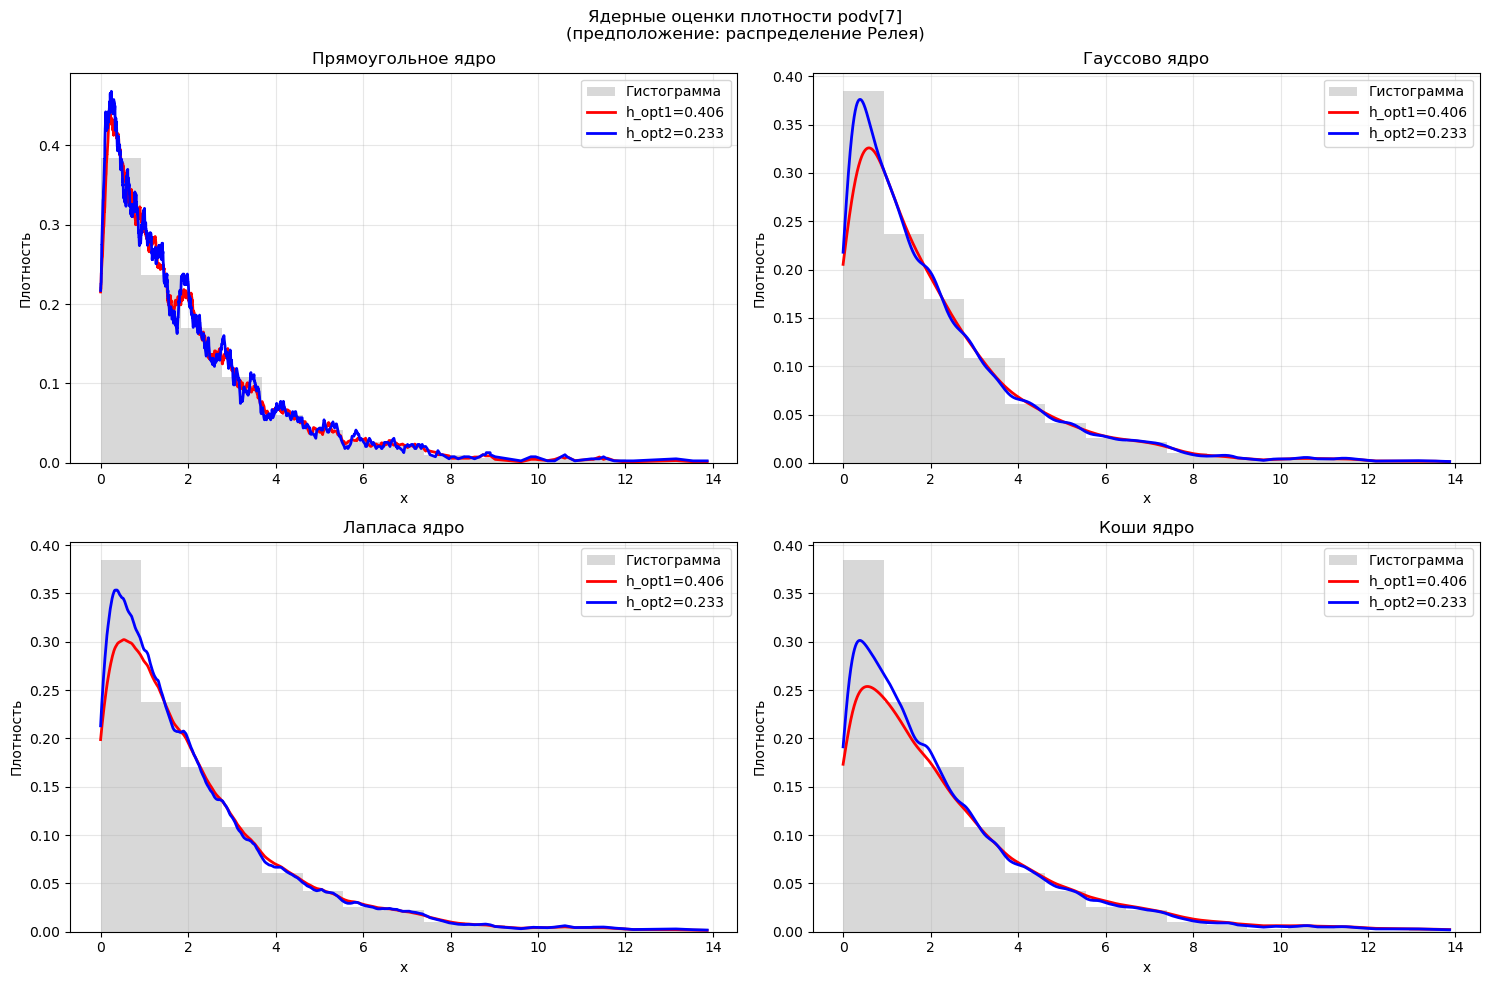


Подвыборка 8:


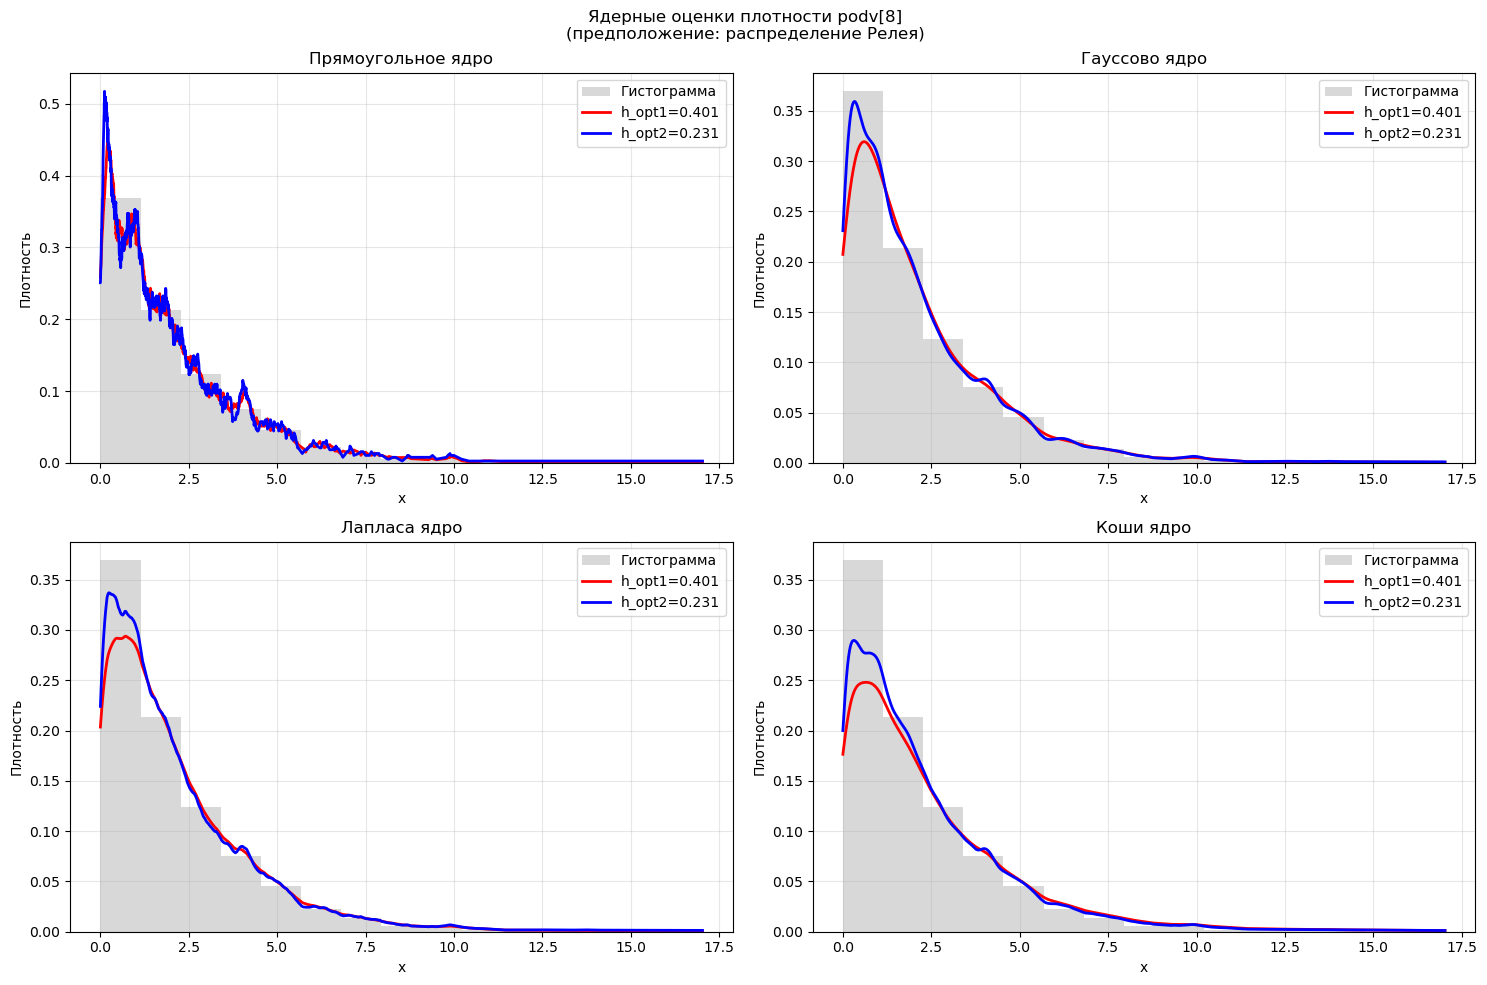


Подвыборка 9:


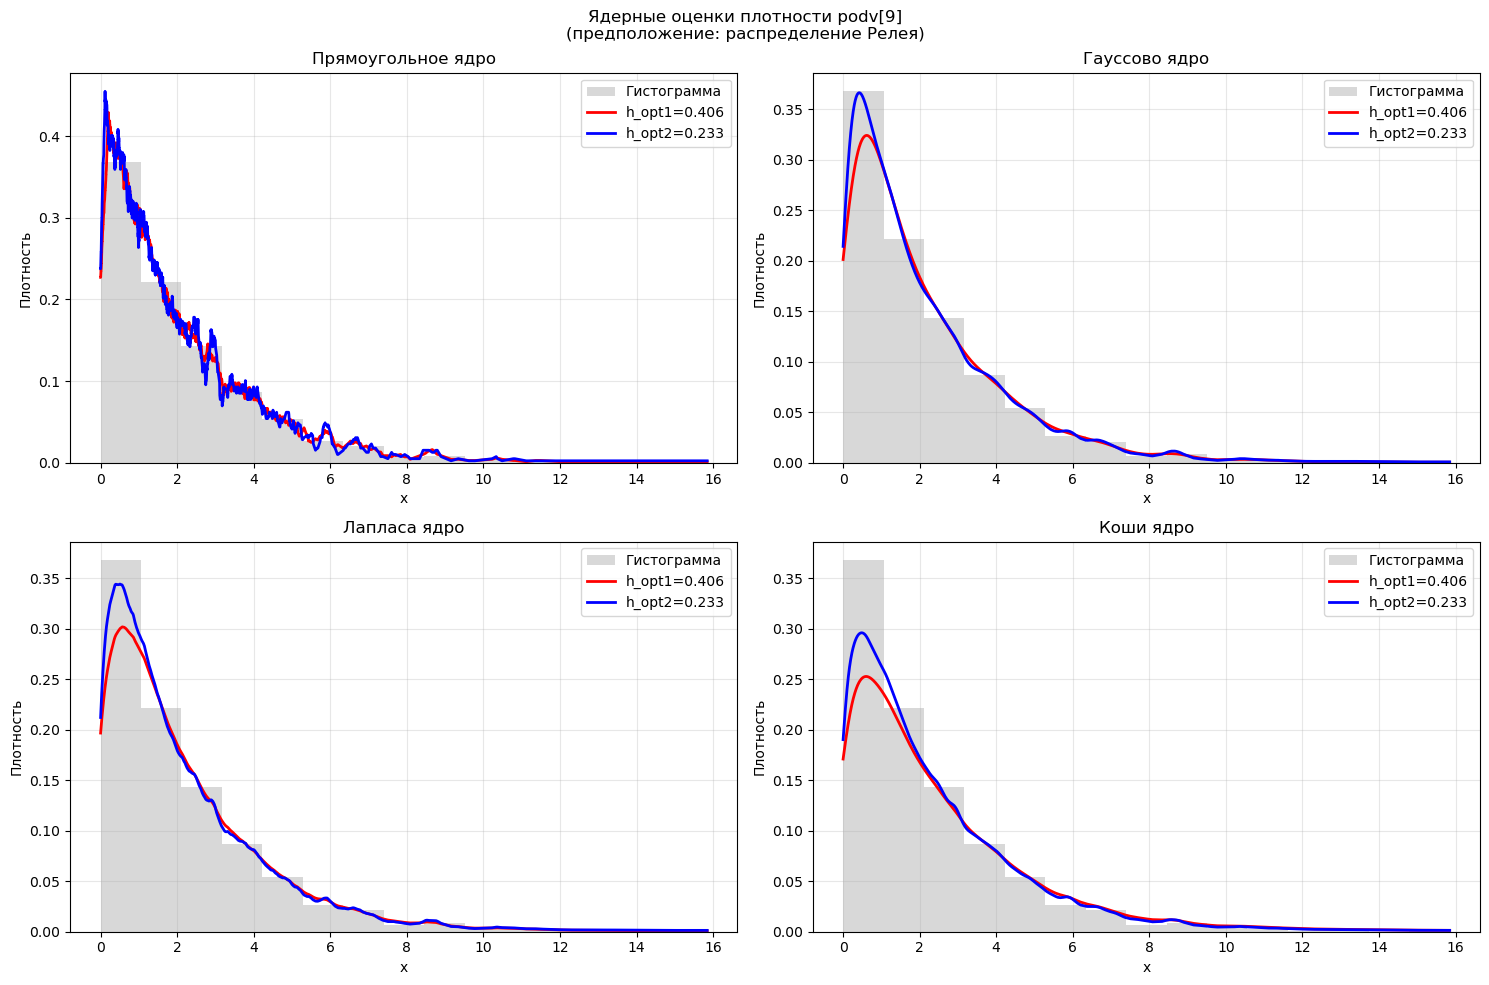


Подвыборка 10:


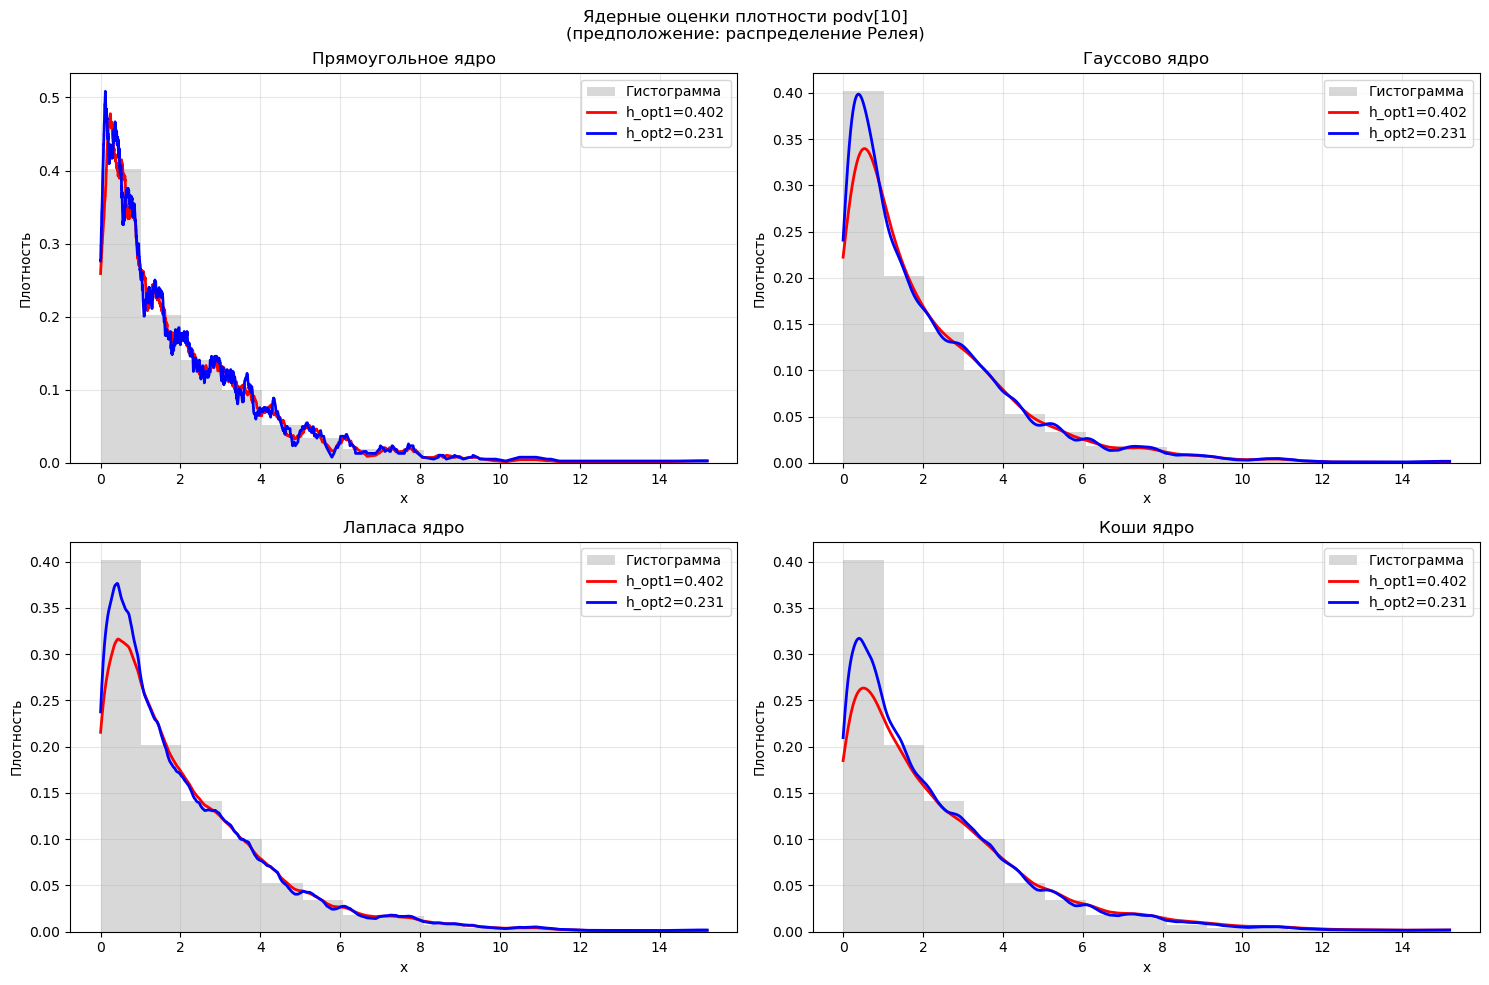

In [100]:
# Ядерная оценка плотности в точке x
def kernel_density(x, data, h, kernel_func):
    n = len(data)
    result = 0.0
    for xi in data:
        result += kernel_func((x - xi) / h)
    return result / (n * h)

# Параметрический выбор оптимального значения h (предположительно имеем дело с распределением Рэлея)
def optimal_h(data, kernel_type='gaussian'):
    N = len(data)
    mean = np.mean(data)
    var = np.var(data)
    
    sigma_rayleigh = mean / np.sqrt(np.pi/2)
    
    Q1 = sigma_rayleigh * np.sqrt(-2 * np.log(0.75))
    Q3 = sigma_rayleigh * np.sqrt(-2 * np.log(0.25))
    IQR = Q3 - Q1
    
    h_opt1 = 1.06 * sigma_rayleigh * N**(-0.2)
    
    A = min(sigma_rayleigh, IQR/1.34)
    h_opt2 = 0.9 * A * N**(-0.2)
    
    return h_opt1, h_opt2

# Построение ядерных оценок с оптимальными h
def plot_kde(data, title=""):
    
    kernels = [
        ('Прямоугольное', uniform_kernel),
        ('Гауссово', gaussian_kernel),
        ('Лапласа', laplas_kernel),
        ('Коши', koshi_kernel)
    ]
    
    h_opt1, h_opt2 = optimal_h(data)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, (kernel_name, kernel_func) in enumerate(kernels):
        ax = axes[idx]
        
        ax.hist(data, bins=15, density=True, alpha=0.3, color='gray', label='Гистограмма')
        
        density_opt1 = np.array([kernel_density(x, data, h_opt1, kernel_func) for x in data])
        density_opt2 = np.array([kernel_density(x, data, h_opt2, kernel_func) for x in data])
        
        ax.plot(data, density_opt1, 'r-', linewidth=2, label=f'h_opt1={h_opt1:.3f}')
        ax.plot(data, density_opt2, 'b-', linewidth=2, label=f'h_opt2={h_opt2:.3f}')
        
        ax.set_title(f'{kernel_name} ядро')
        ax.set_xlabel('x')
        ax.set_ylabel('Плотность')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.suptitle(f'Ядерные оценки плотности {title}\n(предположение: распределение Релея)')
    plt.tight_layout()
    plt.show()
    
    return h_opt1, h_opt2

for i, podv in enumerate(Xpodv_sorted):
    print(f"\nПодвыборка {i+1}:")
    plot_kde(podv, f"podv[{i+1}]")

## Определение точечных оценок
### Точечные оценки моментов (первого начального, центрального момента (2-гоб 3-го и 4-го порядков))

In [119]:
# Оценка Математического ожидания
mean = np.mean(Xperm)
median = np.median(Xperm)
min_max_mean = (np.min(Xperm) + np.max(Xperm)) / 2
counts, bin_edges = np.histogram(Xperm, bins='auto')
max_count_idx = np.argmax(counts)
mode_bin_center = (bin_edges[max_count_idx] + bin_edges[max_count_idx + 1]) / 2
mode_value = counts[max_count_idx]


mean_per_podv = np.mean(Xpodv, axis=1)
median_per_podv = np.median(Xpodv, axis=1)
min_per_podv = np.min(Xpodv, axis=1)
max_per_podv = np.max(Xpodv, axis=1)
min_max_mean_per_podv = (min_per_podv + max_per_podv) / 2

print("Оценка математического ожидания:")
print(f"All data: mean={mean:.4f}, median={median:.4f}, min_max_mean={min_max_mean:.4f}, mode={mode_value:.4f}")
for idx, (mean, median, min_max_mean) in enumerate(zip(mean_per_podv, median_per_podv, min_max_mean_per_podv)):
    counts, bin_edges = np.histogram(Xpodv_sorted[idx], bins='auto')
    max_count_idx = np.argmax(counts)
    mode_bin_center = (bin_edges[max_count_idx] + bin_edges[max_count_idx + 1]) / 2
    mode_value = counts[max_count_idx]

    print(f"podv[{idx+1}]: mean={mean:.4f}, median={median:.4f}, min_max_mean={min_max_mean:.4f}, mode={mode_value:.4f}")

print()
print("Оценка Дисперсии, 3-го центрального момента, 4-го центрального момента, оценка асимметрии, эксцесса")
variance = np.var(Xperm, ddof=1)
moment_3 = scipy.stats.moment(Xperm, moment=3)
moment_4 = scipy.stats.moment(Xperm, moment=4)
skewness = scipy.stats.skew(Xperm)
kurtosis = scipy.stats.kurtosis(Xperm)

print(f"All data: var={variance:.4f}, moment_3={moment_3:.4f}, moment_4={moment_4:.4f}, skewness={skewness:.4f}, kurtosis={kurtosis:.4f}")

# Оценка Дисперсии (3-го центрального момента, 4-го центрального момента) + оценка асимметрии и эксцесса
for idx, data in enumerate(Xpodv_sorted):
    variance = np.var(data, ddof=1) # Дисперсия несмещенная
    moment_3 = scipy.stats.moment(data, moment=3)
    moment_4 = scipy.stats.moment(data, moment=4)

    skewness = scipy.stats.skew(data)
    kurtosis = scipy.stats.kurtosis(data)

    print(f"podv[{idx+1}]: var={variance:.4f}, moment_3={moment_3:.4f}, moment_4={moment_4:.4f}, skewness={skewness:.4f}, kurtosis={kurtosis:.4f}")

Оценка математического ожидания:
All data: mean=2.1000, median=1.4678, min_max_mean=10.0366, mode=1396.0000
podv[1]: mean=2.0406, median=1.4468, min_max_mean=9.8939, mode=285.0000
podv[2]: mean=2.1104, median=1.4708, min_max_mean=6.8892, mode=282.0000
podv[3]: mean=2.0079, median=1.3850, min_max_mean=8.8775, mode=283.0000
podv[4]: mean=2.0587, median=1.4918, min_max_mean=7.4563, mode=263.0000
podv[5]: mean=2.1580, median=1.5027, min_max_mean=10.0373, mode=292.0000
podv[6]: mean=2.2104, median=1.5386, min_max_mean=9.5533, mode=276.0000
podv[7]: mean=2.1134, median=1.4520, min_max_mean=6.9338, mode=286.0000
podv[8]: mean=2.0906, median=1.4922, min_max_mean=8.5124, mode=284.0000
podv[9]: mean=2.1145, median=1.4767, min_max_mean=7.9230, mode=272.0000
podv[10]: mean=2.0957, median=1.4292, min_max_mean=7.5939, mode=319.0000

Оценка Дисперсии, 3-го центрального момента, 4-го центрального момента, оценка асимметрии, эксцесса
All data: var=4.4112, moment_3=18.4789, moment_4=172.6759, skewness=1

### 1.3.3: Оценка границ интерквантильногро промежутка $J_P$ для $P = 0.95$ для полной выборки

In [116]:
alpha = 0.05
lower_quantile = alpha / 2
upper_quantile = 1 - alpha / 2

Q_lower = np.quantile(Xperm, lower_quantile)
Q_upper = np.quantile(Xperm, upper_quantile)

IQR_95 = Q_upper - Q_lower
print("95% ИНТЕРКВАНТИЛЬНЫЙ ПРОМЕЖУТОК:")
print("=" * 50)
print(f"2.5% квантиль (нижняя граница): {Q_lower:.6f}")
print(f"97.5% квантиль (верхняя граница): {Q_upper:.6f}")
print(f"95% интерквантильный промежуток: {IQR_95:.6f}")

95% ИНТЕРКВАНТИЛЬНЫЙ ПРОМЕЖУТОК:
2.5% квантиль (нижняя граница): 0.052691
97.5% квантиль (верхняя граница): 7.746544
95% интерквантильный промежуток: 7.693853


### 1.3.4: Таблица с результатами

In [123]:
columns = ['N', 'X', 'X_med', 'X_cp', 's^2', 's', 'm_3', 'm_4', 'As', 'Ex']
data = []

data.append([
    'N',
    f"{2.1000:.4f}",  # X (mean)
    f"{1.4678:.4f}",  # X_med (median)
    f"{10.0366:.4f}", # X_cp (min_max_mean)
    f"{4.4112:.4f}",  # s^2 (variance)
    f"{np.sqrt(4.4112):.4f}",  # s (std) - вычисляем из дисперсии
    f"{18.4789:.4f}", # m_3
    f"{172.6759:.4f}", # m_4
    f"{1.9947:.4f}",  # As (skewness)
    f"{5.8750:.4f}"   # Ex (kurtosis)
])

podv_data = [
    # [mean, median, min_max_mean, variance, moment_3, moment_4, skewness, kurtosis]
    [2.0406, 1.4468, 9.8939, 4.2773, 19.4859, 194.5792, 2.2047, 7.6482],
    [2.1104, 1.4708, 6.8892, 4.3424, 16.4573, 136.9053, 1.8203, 4.2691],
    [2.0079, 1.3850, 8.8775, 4.0998, 17.1131, 157.4974, 2.0633, 6.3813],
    [2.0587, 1.4918, 7.4563, 4.0236, 15.5439, 132.6265, 1.9277, 5.2021],
    [2.1580, 1.5027, 10.0373, 4.7204, 21.5172, 233.8324, 2.1000, 7.5070],
    [2.2104, 1.5386, 9.5533, 5.0642, 23.6760, 242.0329, 2.0794, 6.4489],
    [2.1134, 1.4520, 6.9338, 4.4847, 18.1664, 154.8535, 1.9145, 4.7086],
    [2.0906, 1.4922, 8.5124, 4.2669, 17.2754, 158.4375, 1.9618, 5.7128],
    [2.1145, 1.4767, 7.9230, 4.3199, 17.1712, 153.5677, 1.9142, 5.2389],
    [2.0957, 1.4292, 7.5939, 4.5070, 17.9551, 157.9800, 1.8783, 4.7868]
]

for i, podv in enumerate(podv_data, 1):
    data.append([
        f'N/10_{i}',
        f"{podv[0]:.4f}",  # X (mean)
        f"{podv[1]:.4f}",  # X_med (median)
        f"{podv[2]:.4f}",  # X_cp (min_max_mean)
        f"{podv[3]:.4f}",  # s^2 (variance)
        f"{np.sqrt(podv[3]):.4f}",  # s (std) - вычисляем из дисперсии
        f"{podv[4]:.4f}",  # m_3
        f"{podv[5]:.4f}",  # m_4
        f"{podv[6]:.4f}",  # As (skewness)
        f"{podv[7]:.4f}"   # Ex (kurtosis)
    ])

df = pd.DataFrame(data, columns=columns)

from IPython.display import display, Markdown

display(Markdown("### Результаты статистического анализа"))
display(Markdown(df.to_markdown(index=False)))

### Результаты статистического анализа

| N       |      X |   X_med |    X_cp |    s^2 |      s |     m_3 |     m_4 |     As |     Ex |
|:--------|-------:|--------:|--------:|-------:|-------:|--------:|--------:|-------:|-------:|
| N       | 2.1    |  1.4678 | 10.0366 | 4.4112 | 2.1003 | 18.4789 | 172.676 | 1.9947 | 5.875  |
| N/10_1  | 2.0406 |  1.4468 |  9.8939 | 4.2773 | 2.0682 | 19.4859 | 194.579 | 2.2047 | 7.6482 |
| N/10_2  | 2.1104 |  1.4708 |  6.8892 | 4.3424 | 2.0838 | 16.4573 | 136.905 | 1.8203 | 4.2691 |
| N/10_3  | 2.0079 |  1.385  |  8.8775 | 4.0998 | 2.0248 | 17.1131 | 157.497 | 2.0633 | 6.3813 |
| N/10_4  | 2.0587 |  1.4918 |  7.4563 | 4.0236 | 2.0059 | 15.5439 | 132.626 | 1.9277 | 5.2021 |
| N/10_5  | 2.158  |  1.5027 | 10.0373 | 4.7204 | 2.1726 | 21.5172 | 233.832 | 2.1    | 7.507  |
| N/10_6  | 2.2104 |  1.5386 |  9.5533 | 5.0642 | 2.2504 | 23.676  | 242.033 | 2.0794 | 6.4489 |
| N/10_7  | 2.1134 |  1.452  |  6.9338 | 4.4847 | 2.1177 | 18.1664 | 154.853 | 1.9145 | 4.7086 |
| N/10_8  | 2.0906 |  1.4922 |  8.5124 | 4.2669 | 2.0656 | 17.2754 | 158.438 | 1.9618 | 5.7128 |
| N/10_9  | 2.1145 |  1.4767 |  7.923  | 4.3199 | 2.0784 | 17.1712 | 153.568 | 1.9142 | 5.2389 |
| N/10_10 | 2.0957 |  1.4292 |  7.5939 | 4.507  | 2.123  | 17.9551 | 157.98  | 1.8783 | 4.7868 |

### 1.3.4: Представление результатов графически

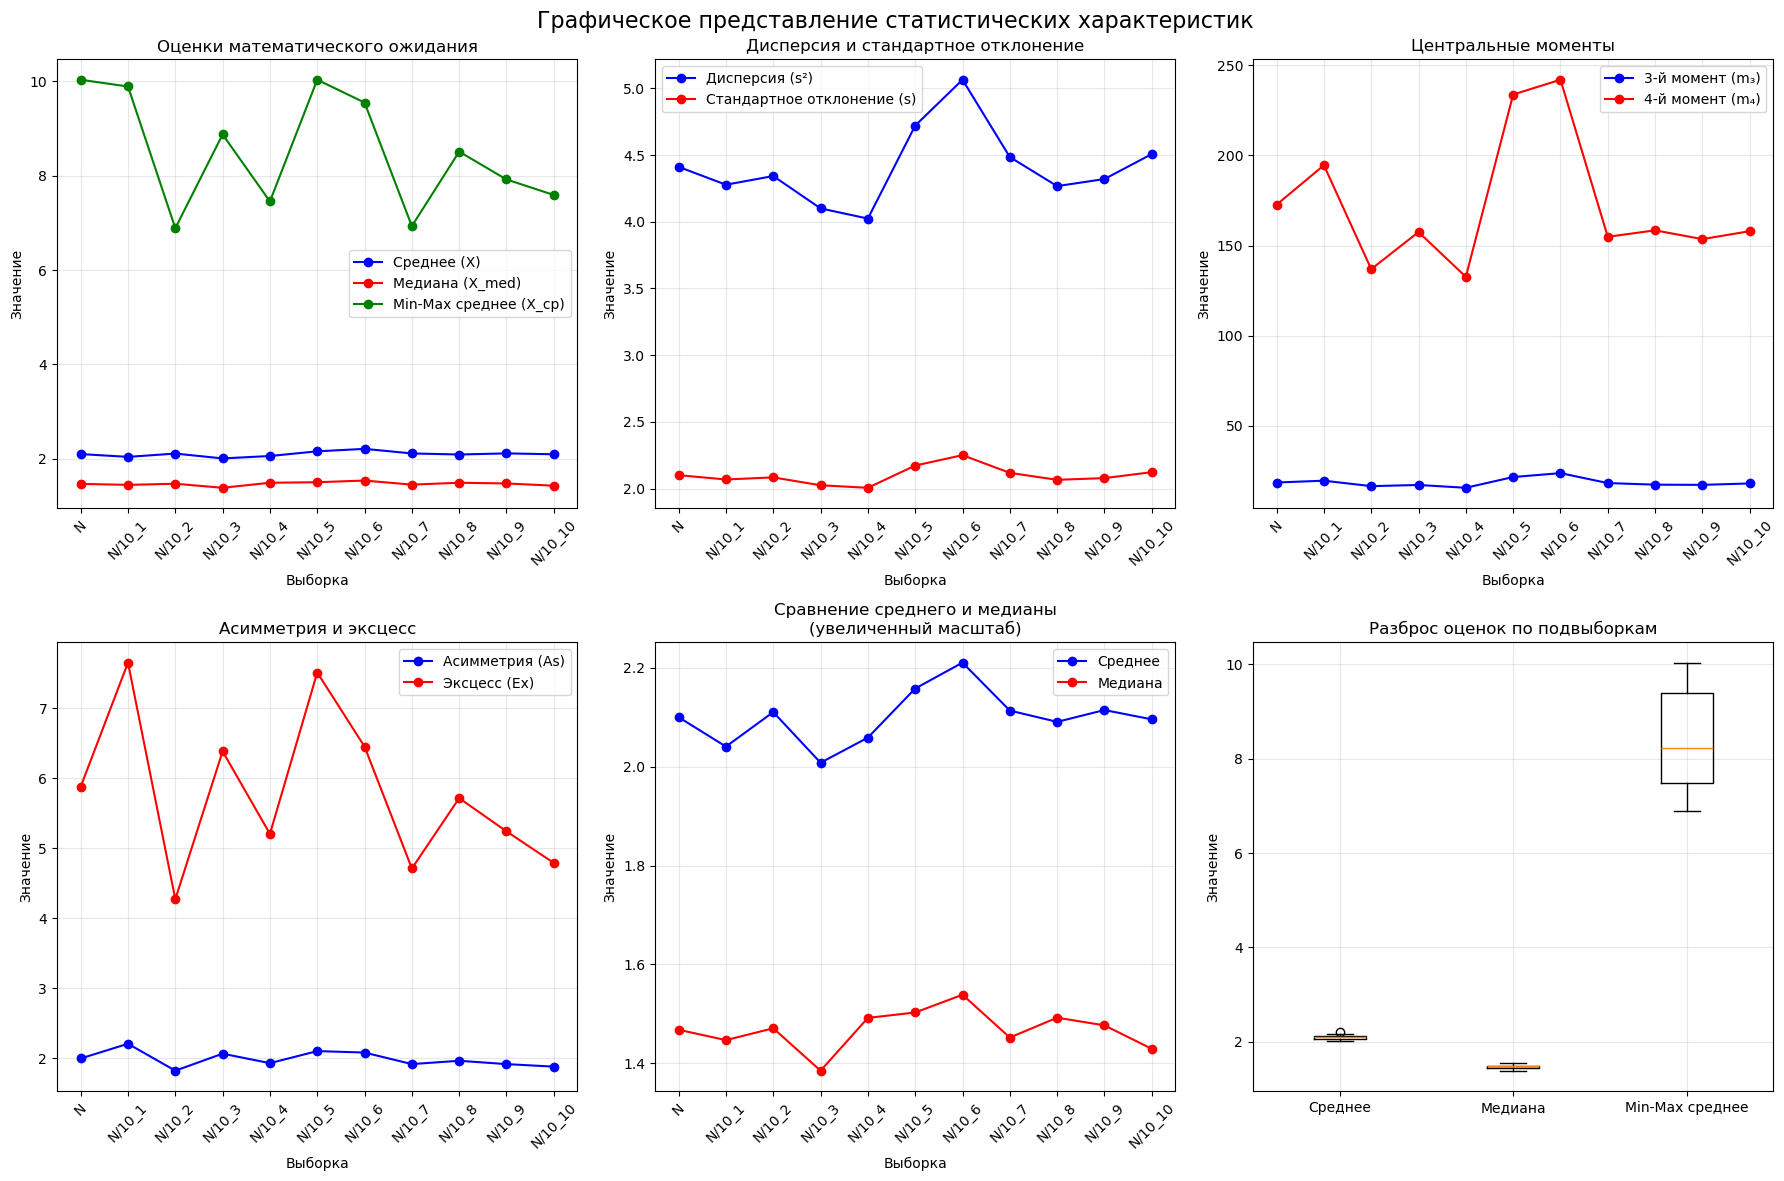

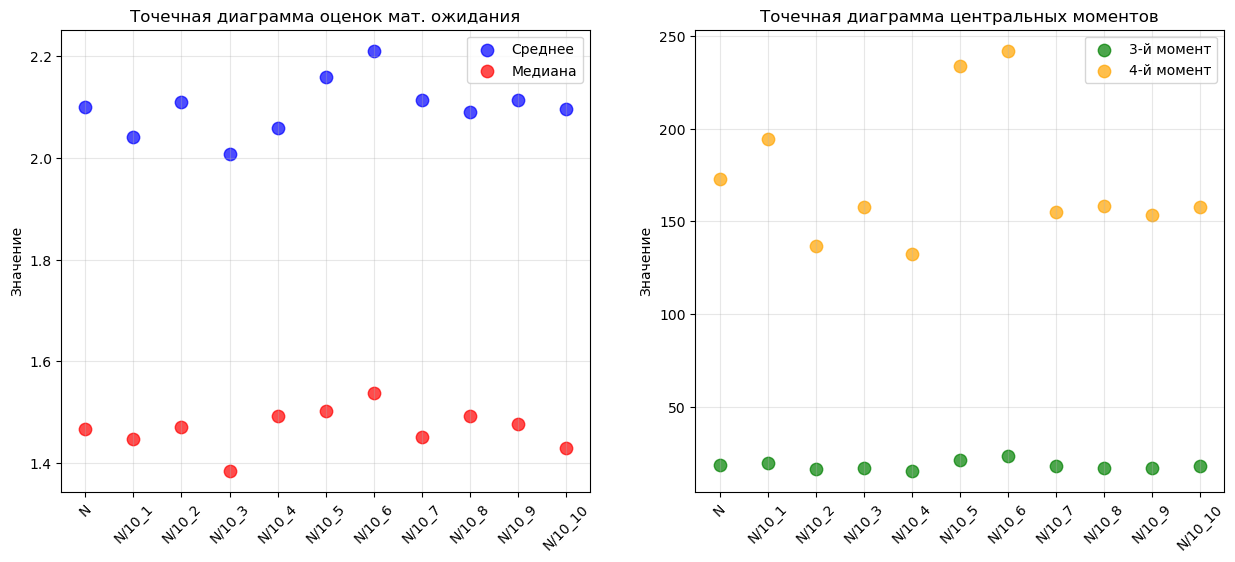

In [126]:
categories = ['N'] + [f'N/10_{i}' for i in range(1, 11)]

means = [2.1000, 2.0406, 2.1104, 2.0079, 2.0587, 2.1580, 2.2104, 2.1134, 2.0906, 2.1145, 2.0957]
medians = [1.4678, 1.4468, 1.4708, 1.3850, 1.4918, 1.5027, 1.5386, 1.4520, 1.4922, 1.4767, 1.4292]
min_max_means = [10.0366, 9.8939, 6.8892, 8.8775, 7.4563, 10.0373, 9.5533, 6.9338, 8.5124, 7.9230, 7.5939]

variances = [4.4112, 4.2773, 4.3424, 4.0998, 4.0236, 4.7204, 5.0642, 4.4847, 4.2669, 4.3199, 4.5070]
std_devs = [np.sqrt(v) for v in variances]
moments_3 = [18.4789, 19.4859, 16.4573, 17.1131, 15.5439, 21.5172, 23.6760, 18.1664, 17.2754, 17.1712, 17.9551]
moments_4 = [172.6759, 194.5792, 136.9053, 157.4974, 132.6265, 233.8324, 242.0329, 154.8535, 158.4375, 153.5677, 157.9800]
skewness = [1.9947, 2.2047, 1.8203, 2.0633, 1.9277, 2.1000, 2.0794, 1.9145, 1.9618, 1.9142, 1.8783]
kurtosis = [5.8750, 7.6482, 4.2691, 6.3813, 5.2021, 7.5070, 6.4489, 4.7086, 5.7128, 5.2389, 4.7868]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Графическое представление статистических характеристик', fontsize=16)

# 1. Оценки математического ожидания
axes[0, 0].plot(categories, means, 'bo-', label='Среднее (X)', markersize=6)
axes[0, 0].plot(categories, medians, 'ro-', label='Медиана (X_med)', markersize=6)
axes[0, 0].plot(categories, min_max_means, 'go-', label='Min-Max среднее (X_cp)', markersize=6)
axes[0, 0].set_title('Оценки математического ожидания')
axes[0, 0].set_ylabel('Значение')
axes[0, 0].set_xlabel('Выборка')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Дисперсия и стандартное отклонение
axes[0, 1].plot(categories, variances, 'bo-', label='Дисперсия (s²)', markersize=6)
axes[0, 1].plot(categories, std_devs, 'ro-', label='Стандартное отклонение (s)', markersize=6)
axes[0, 1].set_title('Дисперсия и стандартное отклонение')
axes[0, 1].set_ylabel('Значение')
axes[0, 1].set_xlabel('Выборка')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Центральные моменты
axes[0, 2].plot(categories, moments_3, 'bo-', label='3-й момент (m₃)', markersize=6)
axes[0, 2].plot(categories, moments_4, 'ro-', label='4-й момент (m₄)', markersize=6)
axes[0, 2].set_title('Центральные моменты')
axes[0, 2].set_ylabel('Значение')
axes[0, 2].set_xlabel('Выборка')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].tick_params(axis='x', rotation=45)

# 4. Асимметрия и эксцесс
axes[1, 0].plot(categories, skewness, 'bo-', label='Асимметрия (As)', markersize=6)
axes[1, 0].plot(categories, kurtosis, 'ro-', label='Эксцесс (Ex)', markersize=6)
axes[1, 0].set_title('Асимметрия и эксцесс')
axes[1, 0].set_ylabel('Значение')
axes[1, 0].set_xlabel('Выборка')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Сравнение всех оценок мат. ожидания (увеличенный масштаб)
axes[1, 1].plot(categories, means, 'bo-', label='Среднее', markersize=6)
axes[1, 1].plot(categories, medians, 'ro-', label='Медиана', markersize=6)
axes[1, 1].set_title('Сравнение среднего и медианы\n(увеличенный масштаб)')
axes[1, 1].set_ylabel('Значение')
axes[1, 1].set_xlabel('Выборка')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Box plot для визуализации разброса оценок
box_data = [means[1:], medians[1:], min_max_means[1:]]  # Исключаем полную выборку
axes[1, 2].boxplot(box_data, tick_labels=['Среднее', 'Медиана', 'Min-Max среднее'])
axes[1, 2].set_title('Разброс оценок по подвыборкам')
axes[1, 2].set_ylabel('Значение')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig2, axes2 = plt.subplots(1, 2, figsize=(15, 6))

# Точечная диаграмма для средних значений
x_pos = range(len(categories))
axes2[0].scatter(x_pos, means, c='blue', s=80, alpha=0.7, label='Среднее')
axes2[0].scatter(x_pos, medians, c='red', s=80, alpha=0.7, label='Медиана')
axes2[0].set_xticks(x_pos)
axes2[0].set_xticklabels(categories, rotation=45)
axes2[0].set_title('Точечная диаграмма оценок мат. ожидания')
axes2[0].set_ylabel('Значение')
axes2[0].legend()
axes2[0].grid(True, alpha=0.3)

# Точечная диаграмма для моментов
axes2[1].scatter(x_pos, moments_3, c='green', s=80, alpha=0.7, label='3-й момент')
axes2[1].scatter(x_pos, moments_4, c='orange', s=80, alpha=0.7, label='4-й момент')
axes2[1].set_xticks(x_pos)
axes2[1].set_xticklabels(categories, rotation=45)
axes2[1].set_title('Точечная диаграмма центральных моментов')
axes2[1].set_ylabel('Значение')
axes2[1].legend()
axes2[1].grid(True, alpha=0.3)

## Определение интервальных оценок с доверительной вероятностью $Q = 0.8$ 

In [128]:
Q = 0.8
P = 0.95

# Доверительные интервалы для полной выборки
def confidence_intervals_full(data, Q=0.8):
    n = len(data)
    alpha = 1 - Q

    mean = np.mean(data)
    std = np.std(data, ddof=1)
    t_val = scipy.stats.t.ppf(1 - alpha/2, n-1)
    mean_ci = (mean - t_val * std / np.sqrt(n), mean + t_val * std / np.sqrt(n))
    
    var = np.var(data, ddof=1)
    chi2_low = scipy.stats.chi2.ppf(1 - alpha/2, n-1)
    chi2_high = scipy.stats.chi2.ppf(alpha/2, n-1)
    var_ci = ((n-1) * var / chi2_low, (n-1) * var / chi2_high)
    
    return mean_ci, var_ci

# Доверительные интервалы для частичных выборок
def confidence_intervals_partial(datasets, Q=0.8):
    mean_cis = []
    var_cis = []
    
    for data in datasets:
        n = len(data)
        alpha = 1 - Q
        
        # Первый начальный момент
        mean = np.mean(data)
        std = np.std(data, ddof=1)
        t_val = scipy.stats.t.ppf(1 - alpha/2, n-1)
        mean_ci = (mean - t_val * std / np.sqrt(n), mean + t_val * std / np.sqrt(n))
        
        # Второй центральный момент
        var = np.var(data, ddof=1)
        chi2_low = scipy.stats.chi2.ppf(1 - alpha/2, n-1)
        chi2_high = scipy.stats.chi2.ppf(alpha/2, n-1)
        var_ci = ((n-1) * var / chi2_low, (n-1) * var / chi2_high)
        
        mean_cis.append(mean_ci)
        var_cis.append(var_ci)
    
    return mean_cis, var_cis

# 2. Толерантные пределы

def stirling_approx(n, k):
    """Приближение Стирлинга для больших чисел сочетаний"""
    return np.sqrt(2 * np.pi * n) * (n / np.e)**n / (
        np.sqrt(2 * np.pi * k) * (k / np.e)**k * 
        np.sqrt(2 * np.pi * (n - k)) * ((n - k) / np.e)**(n - k)
    )


def nonparametric_tolerance_mean_symmetric(data, P=0.95, Q=0.8):
    """Непараметрические толерантные пределы, симметричные относительно среднего"""
    n = len(data)
    data_sorted = np.sort(data)
    mean_val = np.mean(data)
    
    # Находим k последовательным перебором
    k = 0
    while True:
        if k > n/2:
            break
            
        # Для больших n используем приближение Стирлинга
        if n > 50:
            comb_val = stirling_approx(n, k)
        else:
            comb_val = scipy.special.comb(n, k, exact=True)
        
        prob = 1 - 2 * comb_val * (P**k) * ((1 - P)**(n - k))
        
        if prob >= Q:
            break
        k += 1
    
    if k == 0:
        return (data_sorted[0], data_sorted[-1])
    
    if n % 2 == 0:
        lower_idx = n // 2 - k
        upper_idx = n // 2 + k - 1
    else:
        lower_idx = (n - 1) // 2 - k
        upper_idx = (n - 1) // 2 + k
    
    lower_idx = max(0, lower_idx)
    upper_idx = min(n-1, upper_idx)
    
    return (data_sorted[lower_idx], data_sorted[upper_idx])


def nonparametric_tolerance_zero_symmetric(data, P=0.95, Q=0.8):
    """Непараметрические толерантные пределы, симметричные относительно нуля"""
    n = len(data)
    data_abs = np.abs(data)
    data_sorted = np.sort(data_abs)
    
    # Находим r последовательным перебором
    r = 0
    while True:
        if r > n:
            break
            
        # Для больших n используем приближение Стирлинга
        if n > 50:
            comb_val = stirling_approx(n, r)
        else:
            comb_val = scipy.special.comb(n, r, exact=True)
        
        prob = 1 - comb_val * ((1 - P)**r) * (P**(n - r))
        
        if prob >= Q:
            break
        r += 1
    
    if r == 0:
        return data_sorted[-1]
    
    limit_idx = n - r
    limit_idx = max(0, min(n-1, limit_idx))
    
    return data_sorted[limit_idx]


def parametric_tolerance_normal(data, P=0.95, Q=0.8):
    """Параметрические толерантные пределы для нормального распределения"""
    n = len(data)
    mean_val = np.mean(data)
    std_val = np.std(data, ddof=1)
    
    # Коэффициент толерантных пределов для нормального распределения
    k = scipy.stats.norm.ppf((1 + P) / 2) * np.sqrt((n - 1) / scipy.stats.chi2.ppf(1 - Q, n - 1))
    
    lower = mean_val - k * std_val
    upper = mean_val + k * std_val
    
    return (lower, upper)


# Вычисления
print("Расчет интервальных оценок...")

# Доверительные интервалы
mean_ci_full, var_ci_full = confidence_intervals_full(Xperm, Q)
mean_cis_partial, var_cis_partial = confidence_intervals_partial(Xpodv_sorted, Q)

# Точечные оценки для сравнения
mean_point_full = np.mean(Xperm)
var_point_full = np.var(Xperm, ddof=1)

mean_points_partial = [np.mean(data) for data in Xpodv_sorted]
var_points_partial = [np.var(data, ddof=1) for data in Xpodv_sorted]

# Толерантные пределы
print("Расчет толерантных пределов...")
tolerance_mean_full = nonparametric_tolerance_mean_symmetric(Xperm, P, Q)
tolerance_zero_full = nonparametric_tolerance_zero_symmetric(Xperm, P, Q)
tolerance_param_partial = [parametric_tolerance_normal(data, P, Q) for data in Xpodv_sorted]

# Графическое представление
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Доверительные интервалы для матожидания
axes[0, 0].errorbar(0, mean_point_full, yerr=[[mean_point_full - mean_ci_full[0]], 
                                              [mean_ci_full[1] - mean_point_full]], 
                    fmt='o', capsize=5, label='Полная выборка', color='blue')
for i, (mean_ci, mean_point) in enumerate(zip(mean_cis_partial, mean_points_partial)):
    axes[0, 0].errorbar(i+1, mean_point, yerr=[[mean_point - mean_ci[0]], 
                                              [mean_ci[1] - mean_point]], 
                       fmt='o', capsize=5, alpha=0.7)
axes[0, 0].set_title('Доверительные интервалы для матожидания')
axes[0, 0].set_xlabel('Выборка')
axes[0, 0].set_ylabel('Матожидание')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Доверительные интервалы для дисперсии
axes[0, 1].errorbar(0, var_point_full, yerr=[[var_point_full - var_ci_full[0]], 
                                             [var_ci_full[1] - var_point_full]], 
                    fmt='o', capsize=5, label='Полная выборка', color='blue')
for i, (var_ci, var_point) in enumerate(zip(var_cis_partial, var_points_partial)):
    axes[0, 1].errorbar(i+1, var_point, yerr=[[var_point - var_ci[0]], 
                                             [var_ci[1] - var_point]], 
                       fmt='o', capsize=5, alpha=0.7)
axes[0, 1].set_title('Доверительные интервалы для дисперсии')
axes[0, 1].set_xlabel('Выборка')
axes[0, 1].set_ylabel('Дисперсия')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Непараметрические толерантные пределы (симметричные относительно среднего)
axes[1, 0].axhline(y=mean_point_full, color='red', linestyle='--', alpha=0.7, label='Точечная оценка')
axes[1, 0].fill_between([-0.5, 0.5], tolerance_mean_full[0], tolerance_mean_full[1], 
                       alpha=0.3, color='blue', label='Толерантный предел')
axes[1, 0].set_xlim(-0.5, 0.5)
axes[1, 0].set_title('Непараметрические толерантные пределы\n(симметричные относительно среднего)')
axes[1, 0].set_ylabel('Значение')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Непараметрические толерантные пределы (симметричные относительно нуля)
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Нуль')
axes[1, 1].axhline(y=tolerance_zero_full, color='blue', alpha=0.7, label='Толерантный предел')
axes[1, 1].fill_between([-0.5, 0.5], -tolerance_zero_full, tolerance_zero_full, 
                       alpha=0.3, color='blue')
axes[1, 1].set_xlim(-0.5, 0.5)
axes[1, 1].set_title('Непараметрические толерантные пределы\n(симметричные относительно нуля)')
axes[1, 1].set_ylabel('Абсолютное значение')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 5. Параметрические толерантные пределы для частичных выборок
for i, (tolerance, mean_point) in enumerate(zip(tolerance_param_partial, mean_points_partial)):
    axes[2, 0].errorbar(i, mean_point, yerr=[[mean_point - tolerance[0]], 
                                           [tolerance[1] - mean_point]], 
                       fmt='o', capsize=5, alpha=0.7, color='green')
axes[2, 0].set_title('Параметрические толерантные пределы\nдля частичных выборок')
axes[2, 0].set_xlabel('Номер подвыборки')
axes[2, 0].set_ylabel('Значение')
axes[2, 0].grid(True, alpha=0.3)

# 6. Сравнение ширины интервалов
widths = {
    'ДИ матожидания': mean_ci_full[1] - mean_ci_full[0],
    'ДИ дисперсии': var_ci_full[1] - var_ci_full[0],
    'Тол. пред. (среднее)': tolerance_mean_full[1] - tolerance_mean_full[0],
    'Тол. пред. (ноль)': 2 * tolerance_zero_full
}

axes[2, 1].bar(widths.keys(), widths.values(), color=['blue', 'orange', 'green', 'red'])
axes[2, 1].set_title('Сравнение ширины интервалов')
axes[2, 1].set_ylabel('Ширина интервала')
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Выводы
print("\n" + "="*50)
print("ВЫВОДЫ")
print("="*50)

print(f"\n1. Ширина доверительных интервалов:")
print(f"   - ДИ для матожидания: {widths['ДИ матожидания']:.4f}")
print(f"   - ДИ для дисперсии: {widths['ДИ дисперсии']:.4f}")

print(f"\n2. Сравнение толерантных пределов:")
print(f"   - Симметричные относительно среднего: [{tolerance_mean_full[0]:.4f}, {tolerance_mean_full[1]:.4f}]")
print(f"   - Симметричные относительно нуля: ±{tolerance_zero_full:.4f}")

print(f"\n3. Сравнение параметрических и непараметрических методов:")
print("   - Параметрические пределы предполагают нормальность распределения")
print("   - Непараметрические пределы более robust к виду распределения")
print("   - Ширина интервалов зависит от метода и предположений")

print(f"\n4. Интерквантильный промежуток J для P={P}:")
print(f"   - Непараметрический (среднее): {tolerance_mean_full[1] - tolerance_mean_full[0]:.4f}")
print(f"   - Непараметрический (ноль): {2 * tolerance_zero_full:.4f}")
print(f"   - Параметрический (в среднем по подвыборкам): "
      f"{np.mean([t[1] - t[0] for t in tolerance_param_partial]):.4f}")

Расчет интервальных оценок...
Расчет толерантных пределов...


OverflowError: (34, 'Numerical result out of range')